In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df = pd.read_csv('../data/EPL 19-20 outfield_colR.csv')
df1 = pd.read_csv('../data/EFL 19-20 outfield_colR.csv')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.concat([df, df1], axis=0)

In [5]:
df

,player_id,position,player,age,team_id,team,foot,mins_played,nineties,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,interception,total_clearance,effective_clearance,total_long_balls,accurate_long_balls,passes_right,passes_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_fastbreak,att_rf_total,att_lf_total,att_hd_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,head_pass,challenge_lost,aerial_won,aerial_lost,pen_goals_conceded,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,total_pull_back,accurate_pull_back,goal_assist_openplay,att_assist_openplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,second_goal_assist,hit_woodwork,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,total_fastbreak,att_one_on_one,fouled_final_third,goals_openplay,att_openplay,assist_pass_lost,assist_blocked_shot,assist_attempt_saved,assist_post,assist_free_kick_won,assist_handball_won,assist_own_goal,assist_penalty_won,open_play_pass,successful_open_play_pass,attempted_tackle_foul,put_through,successful_put_through,blocked_pass,touches_in_opp_box,attempts_ibox,attempts_obox,expected_goals_nonpenalty,expected_goals_openplay,expected_goals_hd,expected_goals_lf,expected_goals_rf,expected_goals_conceded,expected_goals_nonpenalty_conceded,expected_goalsontarget,expected_goalsontarget_nonpenalty,expected_goalsontarget_nonpenalty_conceded,expected_assists,expected_assists_openplay
0,95658,Defender,Harry Maguire,27.2,1,Manchester United,Right,2610,29.000000,0.896552,0.275862,0.206897,0.034483,0.000000,0.000000,62.896552,53.551724,0.068966,0.000000,24.137931,18.448276,0.034483,0.034483,0.034483,0.344828,0.482759,1.103448,0.689655,0.310345,0.689655,0.206897,0.827586,0.0

In [5]:
players = df['player'].tolist()

In [6]:
# Drop columns
df1 = df.drop(['position', 'player', 'team', 'foot', 'mins_played', 'nineties'], axis=1)

In [7]:
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [8]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [9]:
cluster_range = range( 1, 11 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( transformed )
  cluster_errors.append( clusters.inertia_ )

In [10]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [11]:
# Number of clusters
kmeans = KMeans(n_clusters=11)
# Fitting the input data
kmeans = kmeans.fit(transformed)
# Getting the cluster labels
labels = kmeans.predict(transformed)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [12]:
transformed['cluster'] = clusters

In [13]:
transformed['player'] = players

In [14]:
transformed.columns = ['x','y','cluster','name']

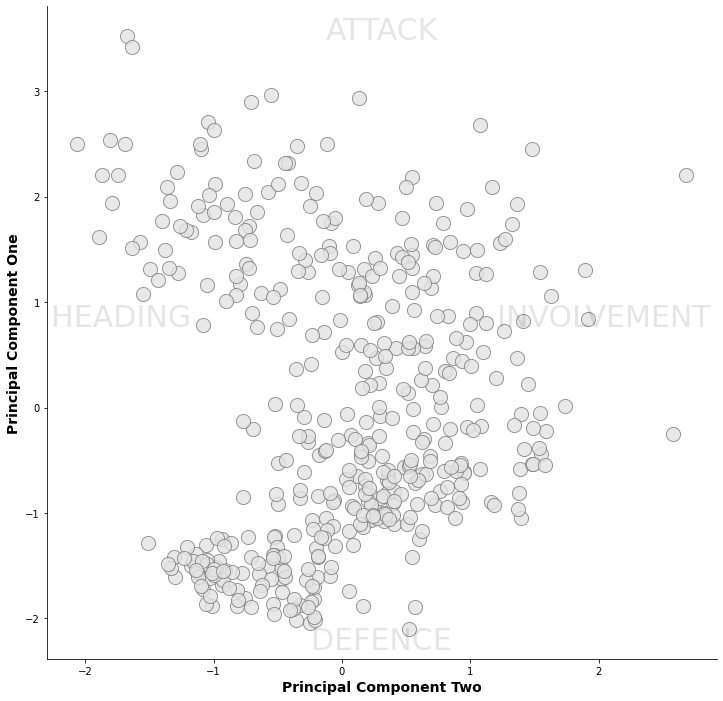

In [32]:
fig, ax = plt.subplots(figsize=(12,12))

# v = df1['total_pass']

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.scatter(transformed['y'], transformed['x'], s=200, facecolors='#E3E3E3', edgecolors='grey', zorder=2, alpha=0.8)

# Add background text
ax.text(0.5, 0.94, 'ATTACK', verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes, color='black', fontsize=30, alpha=0.1)
ax.text(0.5, 0.005, 'DEFENCE', verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes, color='black', fontsize=30, alpha=0.1)
ax.text(0.11, 0.5, 'HEADING', verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes, color='black', fontsize=30, alpha=0.1)
ax.text(0.832, 0.5, 'INVOLVEMENT', verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,color='black', fontsize=30, alpha=0.1)

# texts = []
# for y, x, s in zip(transformed.y, transformed.x, transformed.name):
#     texts.append(plt.text(y, x, s))
# adjust_text((texts) , arrowprops=dict(arrowstyle="->", color='b', lw=0.5))

# Label axis
ax.set_ylabel("Principal Component One",fontsize=14,fontweight="bold",color="black")
ax.set_xlabel("Principal Component Two",fontsize=14,fontweight="bold",color="black");
plt.savefig("PCA_All", dip=500, bbox_inches='tight',transparent=True)